In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import plotly.express as px
import seaborn as sns
from io import StringIO
%matplotlib inline
#pd.set_option('display.max_columns', None,'display.max_rows', None)

### Read in davidson county data

In [2]:
davidson_cases = pd.read_csv('data/davidson_cases.csv')

In [3]:
davidson_cases

,date,county,state,fips,cases,deaths
0,2020-03-08,Davidson,Tennessee,47037,1,0
1,2020-03-09,Davidson,Tennessee,47037,1,0
2,2020-03-10,Davidson,Tennessee,47037,1,0
3,2020-03-11,Davidson,Tennessee,47037,2,0
4,2020-03-12,Davidson,Tennessee,47037,6,0
...,...,...,...,...,...,...
230,2020-10-24,Davidson,Tennessee,47037,33016,336
231,2020-10-25,Davidson,Tennessee,47037,33259,337
232,2020-10-26,Davidson,Tennessee,47037,33699,343
233,2020-10-27,Davidson,Tennessee,47037,33957,341


### Convert date object to date/time

In [4]:
davidson_cases['date'] = davidson_cases['date'].astype('datetime64[ns]')

### Plot deaths and cases over time

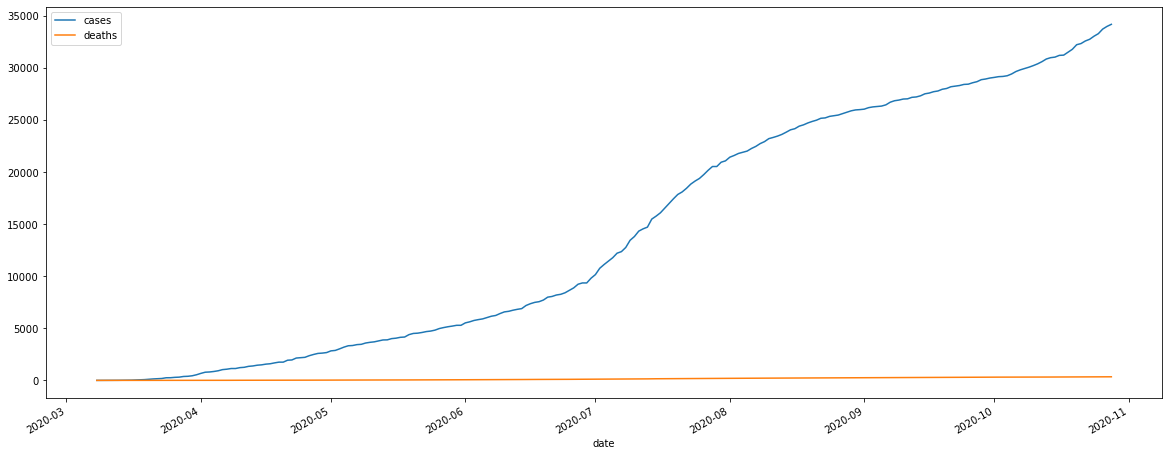

In [5]:
plt.rcParams["figure.figsize"] = (20, 8)
davidson_cases.plot(x='date',y=['cases','deaths']);

### Plot cases over time

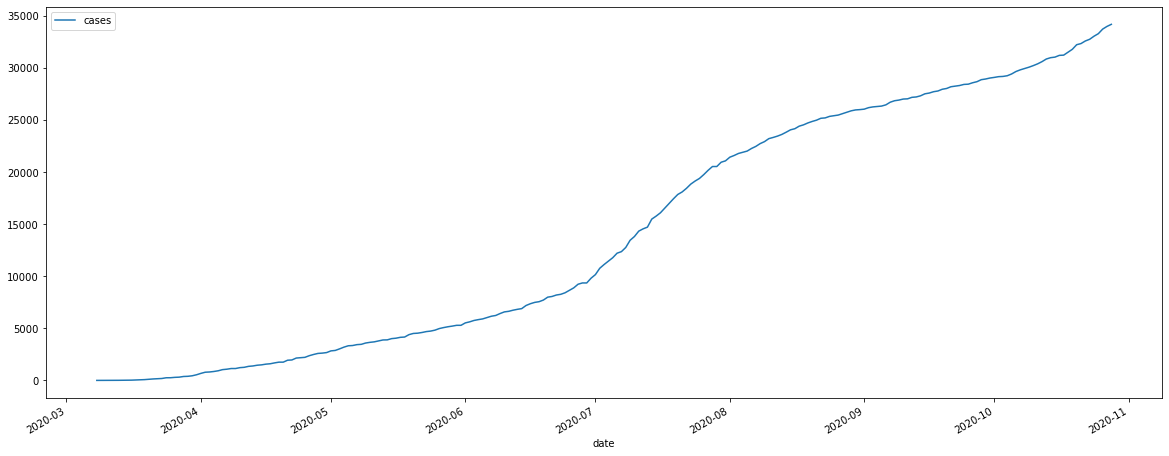

In [6]:
plt.rcParams["figure.figsize"] = (20, 8)
davidson_cases.plot(x='date',y='cases');

### Plot deaths and cases stacked line plot

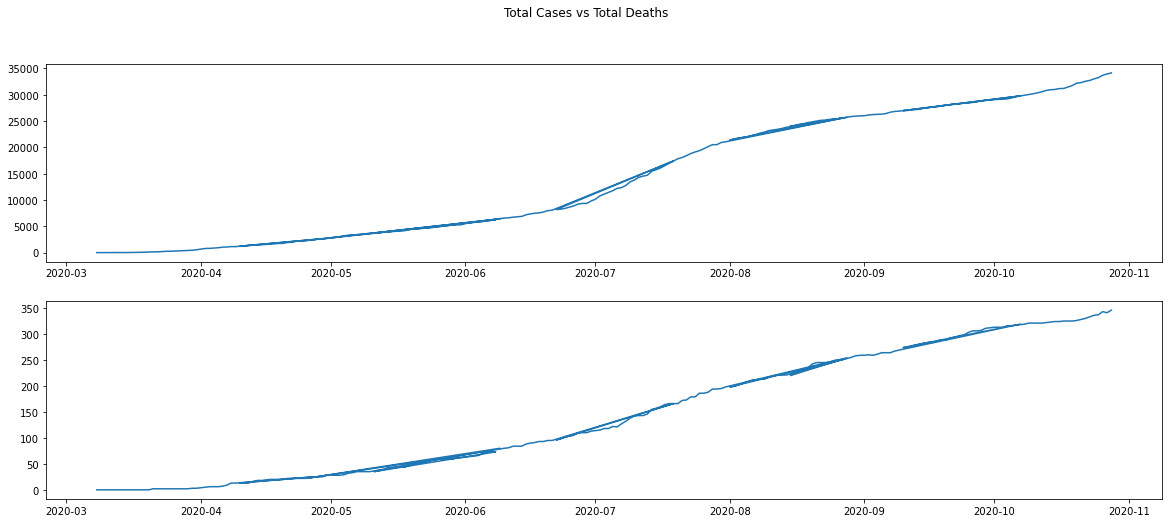

In [7]:
fig, axs = plt.subplots(2)
fig.suptitle('Total Cases vs Total Deaths')
axs[0].plot(davidson_cases['date'],davidson_cases['cases'])
axs[1].plot(davidson_cases['date'],davidson_cases['deaths']);

### Read in clusters data

In [8]:
clusters = pd.read_csv('data/clusters_revised.csv')
clusters_by_type = pd.read_csv('data/clusters_by_type.csv')

In [9]:
clusters

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560
...,...,...,...,...,...,...
57,One Stone Church Service,Church,9/22/2020,10,36.189960,-86.765149
58,Miss Kelli's,Bar,10/1/2020,14,36.164369,-86.778515
59,Nashville Rescue Mission - Women's Campus,Congregate Living,10/1/2020,70,36.153700,-86.777276
60,Link Systems Electric,Other,10/16/2020,12,36.092924,-86.741684


### Sort clusters by type

In [10]:
clusters_by_type.sort_values('Number of Clusters',ascending=False)

,Cluster Type,Number of Clusters
12,LTCF,39
5,Construction,19
4,Congregate Living,13
17,Social Gathering,12
3,Commercial-Warehouse,12
6,Correctional Facility,9
14,Other,9
16,School,7
0,Bar,7
7,Day Care,7


### Coverty date object to date/time data type

In [11]:
clusters['Cluster Start Date'] = clusters['Cluster Start Date'].astype('datetime64[ns]')

### Merge clusters and davidson county data

In [12]:
davidson_clusters = pd.merge(davidson_cases,clusters,left_on='date', right_on='Cluster Start Date')
davidson_clusters

,date,county,state,fips,cases,deaths,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,2020-03-11,Davidson,Tennessee,47037,2,0,Vanderbilt Parties,Social Gathering,2020-03-11,49,36.144703,-86.802655
1,2020-03-14,Davidson,Tennessee,47037,14,0,Event at Clementine Hall,Social Gathering,2020-03-14,23,36.152444,-86.844583
2,2020-03-25,Davidson,Tennessee,47037,257,2,Religious Retreat,Social Gathering,2020-03-25,18,NaN,NaN
3,2020-04-03,Davidson,Tennessee,47037,808,6,The Health Center at Richland Place,LTCF,2020-04-03,47,36.128750,-86.817345
4,2020-04-04,Davidson,Tennessee,47037,856,6,Trevecca Center for Rehab and Healing,LTCF,2020-04-04,102,36.144562,-86.754560
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-09-22,Davidson,Tennessee,47037,28223,294,One Stone Church Service,Church,2020-09-22,10,36.189960,-86.765149
58,2020-10-01,Davidson,Tennessee,47037,29065,313,Miss Kelli's,Bar,2020-10-01,14,36.164369,-86.778515
59,2020-10-01,Davidson,Tennessee,47037,29065,313,Nashville Rescue Mission - Women's Campus,Congregate Living,2020-10-01,70,36.153700,-86.777276
60,2020-10-16,Davidson,Tennessee,47037,31178,324,Link Systems Electric,Other,2020-10-16,12,36.092924,-86.741684


#

In [13]:
d_clusters = davidson_clusters.groupby('Cluster Start Date')['# Cases'].sum().to_frame().reset_index()
d_clusters

,Cluster Start Date,# Cases
0,2020-03-11,49
1,2020-03-14,23
2,2020-03-25,18
3,2020-04-03,47
4,2020-04-04,102
5,2020-04-06,280
6,2020-04-08,12
7,2020-04-13,22
8,2020-04-15,47
9,2020-04-21,22


In [14]:
d_cases = davidson_cases.groupby('date')['cases'].sum().to_frame().reset_index()
d_cases

,date,cases
0,2020-03-08,1
1,2020-03-09,1
2,2020-03-10,1
3,2020-03-11,2
4,2020-03-12,6
...,...,...
230,2020-10-24,33016
231,2020-10-25,33259
232,2020-10-26,33699
233,2020-10-27,33957


In [15]:
date_compare = pd.merge(d_cases,d_clusters,how='left',left_on='date', right_on='Cluster Start Date')
date_compare

,date,cases,Cluster Start Date,# Cases
0,2020-03-08,1,NaT,NaN
1,2020-03-09,1,NaT,NaN
2,2020-03-10,1,NaT,NaN
3,2020-03-11,2,2020-03-11,49.0
4,2020-03-12,6,NaT,NaN
...,...,...,...,...
230,2020-10-24,33016,NaT,NaN
231,2020-10-25,33259,NaT,NaN
232,2020-10-26,33699,NaT,NaN
233,2020-10-27,33957,NaT,NaN


In [16]:
date_compare['cluster pct of total cases'] = date_compare['# Cases'] / date_compare['cases']
date_compare

,date,cases,Cluster Start Date,# Cases,cluster pct of total cases
0,2020-03-08,1,NaT,NaN,NaN
1,2020-03-09,1,NaT,NaN,NaN
2,2020-03-10,1,NaT,NaN,NaN
3,2020-03-11,2,2020-03-11,49.0,24.5
4,2020-03-12,6,NaT,NaN,NaN
...,...,...,...,...,...
230,2020-10-24,33016,NaT,NaN,NaN
231,2020-10-25,33259,NaT,NaN,NaN
232,2020-10-26,33699,NaT,NaN,NaN
233,2020-10-27,33957,NaT,NaN,NaN


Of interest in JSON
"name"
"types"
"vicinity

In [17]:
nville_311 = pd.read_csv('data/hubNashville__311__Service_Requests.csv')
covid_311 = nville_311.drop(['Request Origin', 'System of Origin ID',
       'Contact Type', 'Preferred Language', 'State Issue', 'Parent Request',
       'Closed When Created'], axis = 1)

C:\Users\alvin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
covid_311_rt = covid_311.loc[covid_311['Request Type'].isin(['COVID-19'])]

In [19]:
covid_311_srt = covid_311_rt.loc[covid_311_rt['Subrequest Type'].isin(['COVID-19 Violations'])]

In [20]:
covid_311_srt.drop(columns = ['Additional Subrequest Type'], axis = 1)

,Request #,Status,Request Type,Subrequest Type,Date / Time Opened,Date / Time Closed,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
1547,444823,Closed,COVID-19,COVID-19 Violations,08/14/2020 02:38:00 AM,08/14/2020 02:37:15 PM,2045 Antioch Pike,ANTIOCH,28.0,37013,36.068546,-86.683898,"(36.0685457, -86.6838975)"
3380,479965,Closed,COVID-19,COVID-19 Violations,10/13/2020 11:48:40 AM,10/13/2020 01:48:08 PM,2800 Opryland Dr,NASHVILLE,15.0,37214,36.211269,-86.694302,"(36.211269429469425, -86.6943024067459)"
3661,392927,Closed,COVID-19,COVID-19 Violations,06/16/2020 12:35:20 AM,06/17/2020 02:28:19 PM,2607 12th Ave S,NASHVILLE,18.0,37204,36.123500,-86.790130,"(36.1235, -86.79013)"
3845,444512,Closed,COVID-19,COVID-19 Violations,08/13/2020 06:50:31 PM,08/14/2020 02:22:11 PM,3200 Clarksville Pike,NASHVILLE,2.0,37218,36.194163,-86.831394,"(36.1941628, -86.8313936)"
3877,444440,Closed,COVID-19,COVID-19 Violations,08/13/2020 06:03:09 PM,08/14/2020 02:18:59 PM,20 Grundy St,NASHVILLE,19.0,37203,36.158440,-86.788038,"(36.15843971160494, -86.7880380629013)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482606,497610,Closed,COVID-19,COVID-19 Violations,11/07/2020 01:46:57 AM,11/09/2020 04:35:29 PM,3696 Bell Rd,NASHVILLE,13.0,37214,36.151847,-86.625639,"(36.151847162062914, -86.62563921430471)"
482639,497019,Closed,COVID-19,COVID-19 Violations,11/06/2020 04:43:39 PM,11/09/2020 04:31:47 PM,5106 Old Hickory Blvd,NASHVILLE,1.0,37218,36.212190,-86.920010,"(36.21219, -86.92001)"
482663,497616,Closed,COVID-19,COVID-19 Violations,11/07/2020 02:25:00 AM,11/09/2020 04:22:39 PM,8027 E Lamar Alexander Pkwy,NaN,NaN,NaN,35.679770,-83.736708,"(35.67977, -83.7367077)"
482664,497255,Closed,COVID-19,COVID-19 Violations,11/06/2020 07:19:25 PM,11/09/2020 04:28:53 PM,440 McMurray Dr,NASHVILLE,27.0,37211,36.061900,-86.718060,"(36.0619, -86.71806)"


In [21]:
covid_311_srt['Date / Time Opened'].astype("datetime64[ns]")

1547     2020-08-14 02:38:00
3380     2020-10-13 11:48:40
3661     2020-06-16 00:35:20
3845     2020-08-13 18:50:31
3877     2020-08-13 18:03:09
                 ...        
482606   2020-11-07 01:46:57
482639   2020-11-06 16:43:39
482663   2020-11-07 02:25:00
482664   2020-11-06 19:19:25
482680   2020-11-06 21:39:27
Name: Date / Time Opened, Length: 11741, dtype: datetime64[ns]

In [22]:
covid_311_srt['Date / Time Closed'].astype("datetime64[ns]")

1547     2020-08-14 14:37:15
3380     2020-10-13 13:48:08
3661     2020-06-17 14:28:19
3845     2020-08-14 14:22:11
3877     2020-08-14 14:18:59
                 ...        
482606   2020-11-09 16:35:29
482639   2020-11-09 16:31:47
482663   2020-11-09 16:22:39
482664   2020-11-09 16:28:53
482680   2020-11-09 16:34:04
Name: Date / Time Closed, Length: 11741, dtype: datetime64[ns]

In [23]:
covid_violation_counts = covid_311_srt['Date / Time Opened'].value_counts()
covid_violation_counts = pd.DataFrame(covid_violation_counts)
covid_violation_counts = covid_violation_counts.reset_index()

In [24]:
covid_violation_counts['date'] = covid_violation_counts['index']

In [45]:
covid_violation_counts['date'] = covid_violation_counts['date'].astype("datetime64[ns]")

In [50]:
covid_violation_counts['date']

2020-04-02 19:40:02    1
2020-04-17 18:18:21    1
2020-05-16 18:39:31    1
2020-11-09 00:31:36    1
2020-05-14 14:07:12    1
                      ..
2020-10-22 18:51:48    1
2020-04-08 17:36:03    1
2020-08-24 13:54:07    1
2020-07-31 15:42:33    1
2020-06-12 17:28:11    1
Name: date, Length: 11728, dtype: int64

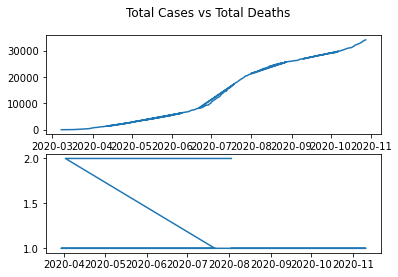

In [47]:
fig, axs = plt.subplots(2)
fig.suptitle('Total Cases vs Total Deaths')
axs[0].plot(davidson_cases['date'],davidson_cases['cases'])
axs[1].plot(covid_violation_counts['date'],covid_violation_counts['Date / Time Opened']);

In [27]:
#fig = px.scatter_mapbox(Ncovid_2, lat="Latitude", lon="Longitude", color="Request Type",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
#fig.show()


NameError: name 'px' is not defined

In [ ]:
#fig = px.scatter_mapbox(covid_viol_cluster_geo, lat="Latitude_left", lon="Longitude_left", 
                        color="Council District", size= "Request #",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, zoom=10,
                        mapbox_style="carto-positron")
#fig.show()